### Directly Creating DatetimeIndex

We have seen that Time Series is a `Series` object or `DataFrame` object with `DatetimeIndex` object as its index. IN earlier examples, the DatetimeIndex was created using `to_datetime` function or `date_range` function.

The `DatetimeIndex` can also be directly constructed using its constructor function as shown below.

In [1]:
import pandas as pd

In [2]:
pd.DatetimeIndex(['04/01/2021', '04/03/2021', '04/05/2021'], freq = "2D", tz = 'Asia/Kolkata')

DatetimeIndex(['2021-04-01 00:00:00+05:30', '2021-04-03 00:00:00+05:30',
               '2021-04-05 00:00:00+05:30'],
              dtype='datetime64[ns, Asia/Kolkata]', freq='2D')

In [3]:
pd.DatetimeIndex(['04/01/2021', '04/03/2021', '04/05/2021'], tz = 'Asia/Kolkata')

DatetimeIndex(['2021-04-01 00:00:00+05:30', '2021-04-03 00:00:00+05:30',
               '2021-04-05 00:00:00+05:30'],
              dtype='datetime64[ns, Asia/Kolkata]', freq=None)

## Importing time series data from CSV file

In the following example, we will use the daily time series of [Open Power System Data (OPSD) for Germany](https://open-power-system-data.org).

In [4]:
opsd = pd.read_csv("opsd_germany_daily.csv") 
opsd.Date = pd.to_datetime(opsd.Date)
opsd.set_index('Date', inplace=True)   # Set 'Date' column as the index column
opsd.info()   # Print concise summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
dtypes: float64(4)
memory usage: 171.2 KB


The same result can be more conveniently achieved by supplying necessary arguments to `read_csv` function.
The `parse_dates` argument coupled with `index_col` argument is helpful to import time series from a text file.

In [5]:
opsd2 = pd.read_csv("opsd_germany_daily.csv", parse_dates = ['Date'], index_col = 'Date')

In [9]:
opsd2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
dtypes: float64(4)
memory usage: 171.2 KB


In [10]:
opsd.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


### Time shifting

Time shifting can be done using a `shift` mathod

In [11]:
opsd.shift().head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,1069.184,NaN,NaN,NaN
2006-01-03,1380.521,NaN,NaN,NaN
2006-01-04,1442.533,NaN,NaN,NaN
2006-01-05,1457.217,NaN,NaN,NaN


Note that by default shifting has been done with period = 1. Shifting with different period can be accomplished as 

In [12]:
opsd.shift(-1).head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1380.521,NaN,NaN,NaN
2006-01-02,1442.533,NaN,NaN,NaN
2006-01-03,1457.217,NaN,NaN,NaN
2006-01-04,1477.131,NaN,NaN,NaN
2006-01-05,1403.427,NaN,NaN,NaN


Note that the first observation is lost when shift with period = -1 is performed. With shift = 1, the last observation would be lost.

This loss can be avoided by supplying `freq` argument, which results in inserting an apprppriate datetime index.

In [13]:
opsd.shift(-2, freq = 'D').head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2005-12-30,1069.184,NaN,NaN,NaN
2005-12-31,1380.521,NaN,NaN,NaN
2006-01-01,1442.533,NaN,NaN,NaN
2006-01-02,1457.217,NaN,NaN,NaN
2006-01-03,1477.131,NaN,NaN,NaN


Observe that a Timestamp `2005-12-31` has been introduced in the begining to accommodate the shifted data.

In [16]:
opsd.tail()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131
2017-12-30,1215.44897,721.247,7.467,728.714
2017-12-31,1107.11488,721.176,19.980,741.156


In [15]:
opsd.shift(-2, freq = 'D').tail()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-12-25,1263.94091,394.507,16.530,411.037
2017-12-26,1299.86398,506.424,14.162,520.586
2017-12-27,1295.08753,584.277,29.854,614.131
2017-12-28,1215.44897,721.247,7.467,728.714
2017-12-29,1107.11488,721.176,19.980,741.156


### Resampling

Lets first create a Monthly series

In [9]:
mindex = pd.date_range('01/01/2017', periods = 24, freq = 'M')
monthly = pd.Series(range(1,25), index = mindex)
monthly

2017-01-31     1
2017-02-28     2
2017-03-31     3
2017-04-30     4
2017-05-31     5
2017-06-30     6
2017-07-31     7
2017-08-31     8
2017-09-30     9
2017-10-31    10
2017-11-30    11
2017-12-31    12
2018-01-31    13
2018-02-28    14
2018-03-31    15
2018-04-30    16
2018-05-31    17
2018-06-30    18
2018-07-31    19
2018-08-31    20
2018-09-30    21
2018-10-31    22
2018-11-30    23
2018-12-31    24
Freq: M, dtype: int64

### Changing frequency of Time Series

Frequency of a time series can be changed using `asfreq` method. The following code changes the frequency of time series `monthly` to Daily.

#### Upsampling

The operation of changing the frequency is referred to as *resampling*. When the new frequency is higher than the original one, as in above example, it is referred to as *upsampling*. The upsampling operation introduces the intermediate timestamps. For these intermediate timestamps, the corresponding time series values are missing by default.


In [10]:
monthly.asfreq('D').iloc[:40]

2017-01-31    1.0
2017-02-01    NaN
2017-02-02    NaN
2017-02-03    NaN
2017-02-04    NaN
2017-02-05    NaN
2017-02-06    NaN
2017-02-07    NaN
2017-02-08    NaN
2017-02-09    NaN
2017-02-10    NaN
2017-02-11    NaN
2017-02-12    NaN
2017-02-13    NaN
2017-02-14    NaN
2017-02-15    NaN
2017-02-16    NaN
2017-02-17    NaN
2017-02-18    NaN
2017-02-19    NaN
2017-02-20    NaN
2017-02-21    NaN
2017-02-22    NaN
2017-02-23    NaN
2017-02-24    NaN
2017-02-25    NaN
2017-02-26    NaN
2017-02-27    NaN
2017-02-28    2.0
2017-03-01    NaN
2017-03-02    NaN
2017-03-03    NaN
2017-03-04    NaN
2017-03-05    NaN
2017-03-06    NaN
2017-03-07    NaN
2017-03-08    NaN
2017-03-09    NaN
2017-03-10    NaN
2017-03-11    NaN
Freq: D, dtype: float64

Instead of getting missing values, we can specify the *fill values* for the intermediate timestamps as shown below.

In [11]:
monthly.asfreq('D', fill_value = 0).iloc[:60]

2017-01-31    1
2017-02-01    0
2017-02-02    0
2017-02-03    0
2017-02-04    0
2017-02-05    0
2017-02-06    0
2017-02-07    0
2017-02-08    0
2017-02-09    0
2017-02-10    0
2017-02-11    0
2017-02-12    0
2017-02-13    0
2017-02-14    0
2017-02-15    0
2017-02-16    0
2017-02-17    0
2017-02-18    0
2017-02-19    0
2017-02-20    0
2017-02-21    0
2017-02-22    0
2017-02-23    0
2017-02-24    0
2017-02-25    0
2017-02-26    0
2017-02-27    0
2017-02-28    2
2017-03-01    0
2017-03-02    0
2017-03-03    0
2017-03-04    0
2017-03-05    0
2017-03-06    0
2017-03-07    0
2017-03-08    0
2017-03-09    0
2017-03-10    0
2017-03-11    0
2017-03-12    0
2017-03-13    0
2017-03-14    0
2017-03-15    0
2017-03-16    0
2017-03-17    0
2017-03-18    0
2017-03-19    0
2017-03-20    0
2017-03-21    0
2017-03-22    0
2017-03-23    0
2017-03-24    0
2017-03-25    0
2017-03-26    0
2017-03-27    0
2017-03-28    0
2017-03-29    0
2017-03-30    0
2017-03-31    3
Freq: D, dtype: int64

Apart from specifying the `fill_value`, there are other options such as specifying fill method.

#### Down Sampling

When the new frequency is lower than the original one, it is referred to as *down sampling*. By default, down sampling discards the values corresponding to the intermediate frequency not retained in the operation.

In [12]:
monthly.asfreq('Q')

2017-03-31     3
2017-06-30     6
2017-09-30     9
2017-12-31    12
2018-03-31    15
2018-06-30    18
2018-09-30    21
2018-12-31    24
Freq: Q-DEC, dtype: int64

Resampling can also be achieved using `reindex` method as shown below.

In [13]:
dindex = pd.date_range('01/01/2017', '31/12/18', freq = 'Q')
monthly.reindex(dindex)

2017-03-31     3
2017-06-30     6
2017-09-30     9
2017-12-31    12
2018-03-31    15
2018-06-30    18
2018-09-30    21
2018-12-31    24
Freq: Q-DEC, dtype: int64

Instead of discarding the intermediate values, if we want to do some aggregation of these values, we can use a more useful method `resample` to perform resampling.

### The `resample` method


In [14]:
monthly.resample('Q')

Note that the `resample` method returns a Resampler object. To see the resampled time series, we need to apply an appropriate method to the Resampler object.

In [15]:
monthly.resample('Q').mean()

2017-03-31     2.0
2017-06-30     5.0
2017-09-30     8.0
2017-12-31    11.0
2018-03-31    14.0
2018-06-30    17.0
2018-09-30    20.0
2018-12-31    23.0
Freq: Q-DEC, dtype: float64

### Plotting Time Series

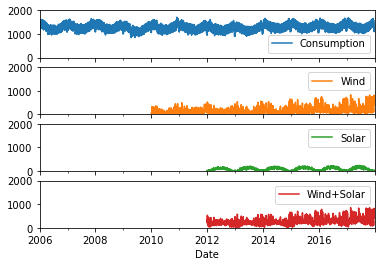

In [16]:
import matplotlib.pyplot as plt
opsd.plot(subplots = True, ylim = (0, 2000))
plt.show()